# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [284]:
import os
import pandas as pd
import numpy as np
import re
import pylab as pl
PUIdata = os.getenv('PUIDATA')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# # Load dataset
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9'\
                   , usecols=['Created Date', 'Complaint Type','Community Board', 'Borough',\
                              'Resolution Description'])
data.head()

,Created Date,Complaint Type,Resolution Description,Community Board,Borough
0,11/05/2015 02:59:15 AM,Street Condition,NaN,13 BROOKLYN,BROOKLYN
1,11/05/2015 02:09:49 AM,Opinion for the Mayor,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified
2,11/05/2015 02:06:51 AM,Root/Sewer/Sidewalk Condition,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,11/05/2015 02:02:20 AM,Illegal Parking,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
4,11/05/2015 01:57:20 AM,Benefit Card Replacement,The Human Resources Administration received yo...,0 Unspecified,Unspecified


In [3]:
len(data)

10187766

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [4]:
# Check if all Boroughs and Community Districts are represented in the Data 
unique_borough = data.Borough.unique()
unique_community_board = data['Community Board'].unique()
print("Borough \n")
for i in data.Borough.unique():
    print(i)

Borough 

BROOKLYN
Unspecified
STATEN ISLAND
MANHATTAN
BRONX
QUEENS


#### All 5 boroughs are represented

In [7]:
com = data['Community Board'].unique()
com = pd.Series(com)

In [8]:
# How many unique values do we have? 
print('Total number of borough %s'%(len(unique_borough)))
print('Total number of community districts %s'%(len(unique_community_board)))

Total number of borough 6
Total number of community districts 77


In [83]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

#### There are 77 community districts in the data file which contain the 59  community districts and improperly filled/classified community districts.

In [10]:
# Check for duplicates? Are these plausible?
data[data.duplicated()]

,Created Date,Complaint Type,Resolution Description,Community Board,Borough
209,11/04/2015 11:03:37 PM,ELECTRIC,The following complaint conditions are still o...,03 BROOKLYN,BROOKLYN
271,11/04/2015 10:41:11 PM,ELECTRIC,The following complaint conditions are still o...,05 BRONX,BRONX
304,11/04/2015 10:30:00 PM,Noise,NaN,06 MANHATTAN,MANHATTAN
332,11/04/2015 10:20:04 PM,DOOR/WINDOW,The following complaint conditions are still o...,04 BROOKLYN,BROOKLYN
335,11/04/2015 10:20:04 PM,HEAT/HOT WATER,The following complaint conditions are still o...,04 BROOKLYN,BROOKLYN
336,11/04/2015 10:20:04 PM,DOOR/WINDOW,The following complaint conditions are still o...,04 BROOKLYN,BROOKLYN
379,11/04/2015 10:08:49 PM,ELECTRIC,The following complaint conditions are still o...,04 BROOKLYN,BROOKLYN
381,11/04/2015 10:08:49 PM,GENERAL,The following complaint conditions are still o...,04 BROOKLYN,BROOKLYN
384,11/04/2015 10:08:48 PM,PAINT/PLASTER,The following complaint conditions are still o...,04 BROOKLYN,BROOKLYN
385,11/04/2015 10:08:48 PM,PAINT/PLASTER,The following complaint conditions are still o...,04 BROOKLYN,BROOKLYN


In [11]:
print("Total number of duplicated values %s"%data.duplicated().sum())

Total number of duplicated values 2578639


In [12]:
duplicate_data = data[data.duplicated() == True]

In [13]:
for i in unique_borough:
    print('Borough : %s \n'%i)
    print(duplicate_data[duplicate_data['Borough'] == i].count())
    print('\n')

Borough : BROOKLYN 

Created Date              621141
Complaint Type            621141
Resolution Description    568081
Community Board           621141
Borough                   621141
dtype: int64


Borough : Unspecified 

Created Date              781309
Complaint Type            781309
Resolution Description    775664
Community Board           781309
Borough                   781309
dtype: int64


Borough : STATEN ISLAND 

Created Date              38543
Complaint Type            38543
Resolution Description    24725
Community Board           38543
Borough                   38543
dtype: int64


Borough : MANHATTAN 

Created Date              346599
Complaint Type            346599
Resolution Description    314011
Community Board           346599
Borough                   346599
dtype: int64


Borough : BRONX 

Created Date              562749
Complaint Type            562749
Resolution Description    512653
Community Board           562749
Borough                   562749
dtype: in

In [14]:
unique_data = data[data.duplicated() == False]

In [88]:
# What about missing values? Can you detect any patterns? 
for i in unique_borough:
    print('Borough : %s \n'%i)
    print(unique_data[unique_data['Borough'] == i].count())
    print('\n')

Borough : BROOKLYN 

Created Date              2210791
Complaint Type            2210791
Resolution Description    1146554
Community Board           2210791
Borough                   2210791
dtype: int64


Borough : Unspecified 

Created Date              328137
Complaint Type            328137
Resolution Description    305036
Community Board           328137
Borough                   328137
dtype: int64


Borough : STATEN ISLAND 

Created Date              452455
Complaint Type            452455
Resolution Description    171544
Community Board           452455
Borough                   452455
dtype: int64


Borough : MANHATTAN 

Created Date              1553406
Complaint Type            1553406
Resolution Description     874407
Community Board           1553406
Borough                   1553406
dtype: int64


Borough : BRONX 

Created Date              1102876
Complaint Type            1102876
Resolution Description     636012
Community Board           1102876
Borough                

#### Each Borough has missing values in the resolution description column. Unresolved complained might be a cause of incomplete resolution description column.

In [24]:
unique_count = []
for i in unique_borough:
    unique_count.append(unique_data[unique_data['Borough'] == i].count())

In [46]:
for i in range(len(unique_borough)):
    print(("%s : %s")%(unique_borough[i],100*float(unique_count[i][2])/float(unique_count[i][4])))

BROOKLYN : 51.8617092253
Unspecified : 92.9599527027
STATEN ISLAND : 37.9140467008
MANHATTAN : 56.2896628441
BRONX : 57.6684958236
QUEENS : 46.335692458


#### Most unresolved problems are in Staten Island with only 37.91% complaints resolved.

In [89]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?
unique_data.head()

,Created Date,Complaint Type,Resolution Description,Community Board,Borough
0,11/05/2015 02:59:15 AM,Street Condition,NaN,13 BROOKLYN,BROOKLYN
1,11/05/2015 02:09:49 AM,Opinion for the Mayor,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified
2,11/05/2015 02:06:51 AM,Root/Sewer/Sidewalk Condition,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,11/05/2015 02:02:20 AM,Illegal Parking,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
4,11/05/2015 01:57:20 AM,Benefit Card Replacement,The Human Resources Administration received yo...,0 Unspecified,Unspecified


In [48]:
# unique_data[unique_data['Complaint Type'] == 'Root/Sewer/Sidewalk Condition']

In [49]:
#unique_data[unique_data['Complaint Type'] == 'Street Condition']

In [50]:
#unique_data[unique_data['Complaint Type'] == 'Illegal Parking']

In [51]:
#(unique_data[unique_data['Complaint Type'] == 'Benefit Card Replacement']['Community Board'] == '01 MANHATTAN').sum() 

In [ ]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

#### Converting community board into pandas Series for generating markers

In [53]:
community_board = pd.Series(data['Community Board'])
community_board.head()

0      13 BROOKLYN
1    0 Unspecified
2      18 BROOKLYN
3      12 BROOKLYN
4    0 Unspecified
Name: Community Board, dtype: object

#### Using regular expressions to convert community board column into numeric index of the community district and name of the borough of the community district

In [54]:
data['Community Index'] =community_board.str.extract('(\d+)', expand=True)
data['Community Borough'] = community_board.str.extract('([A-Z]\w{0,})', expand=True)
data.head()

,Created Date,Complaint Type,Resolution Description,Community Board,Borough,Community Index,Community Borough
0,11/05/2015 02:59:15 AM,Street Condition,NaN,13 BROOKLYN,BROOKLYN,13,BROOKLYN
1,11/05/2015 02:09:49 AM,Opinion for the Mayor,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified,0,Unspecified
2,11/05/2015 02:06:51 AM,Root/Sewer/Sidewalk Condition,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN,18,BROOKLYN
3,11/05/2015 02:02:20 AM,Illegal Parking,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN,12,BROOKLYN
4,11/05/2015 01:57:20 AM,Benefit Card Replacement,The Human Resources Administration received yo...,0 Unspecified,Unspecified,0,Unspecified


In [55]:
len(data)

10187766

#### Converting string type Community index column into numeric data to find the count of actual Community districts in each Borough

In [58]:
data['Community Index'] = pd.to_numeric(data['Community Index'])
type(data['Community Index'][0])

numpy.float64

#### Creating boolean data the actual community districts in Manhattan. Manhattan has 12 community districts.

In [59]:
cd_manhattan =(data['Community Index'] > 0) & (data['Community Index'] < 13) \
& (data['Community Borough'] == 'MANHATTAN')

#### Creating boolean data the actual community districts in Brooklyn. Brooklyn has 18 community districts.

In [60]:
cd_brooklyn = (data['Community Index'] > 0) & (data['Community Index'] < 19) \
& (data['Community Borough'] == 'BROOKLYN')

#### Creating boolean data the actual community districts in Queens. Queens has 14 community districts.

In [61]:
cd_queens = (data['Community Index'] > 0) & (data['Community Index'] < 15) \
& (data['Community Borough'] == 'QUEENS')

#### Creating boolean data the actual community districts in Staten Island. Staten Island has 3 community districts.
Note: Using STATEN as community Borough since the Regex caputes only the first word of the community board

In [62]:
cd_statenisland = (data['Community Index'] > 0) & (data['Community Index'] < 4) \
& (data['Community Borough'] == 'STATEN')

#### Creating the actual community districts in Bronx. Bronx has 12 community districts.

In [63]:
cd_bronx = (data['Community Index'] > 0) & (data['Community Index'] < 13) \
& (data['Community Borough'] == 'BRONX')

#### Adding all the boolean values.

In [64]:
cd_total = cd_manhattan | cd_brooklyn | cd_queens | cd_statenisland | cd_bronx

In [65]:
unspecified = data[~cd_total]
unspecified.head()

,Created Date,Complaint Type,Resolution Description,Community Board,Borough,Community Index,Community Borough
1,11/05/2015 02:09:49 AM,Opinion for the Mayor,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified,0.0,Unspecified
4,11/05/2015 01:57:20 AM,Benefit Card Replacement,The Human Resources Administration received yo...,0 Unspecified,Unspecified,0.0,Unspecified
6,11/05/2015 01:55:37 AM,Agency Issues,Your comments have been submitted to the Depar...,0 Unspecified,Unspecified,0.0,Unspecified
70,11/05/2015 12:10:22 AM,Opinion for the Mayor,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified,0.0,Unspecified
72,11/05/2015 12:09:21 AM,Opinion for the Mayor,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified,0.0,Unspecified


#### Unspecified in a dataframe with improperly classified community boards.

In [66]:
# Drop the marked districts
clean_data = data[cd_total]
clean_data.drop(['Community Index', 'Community Borough'], axis = 1, inplace=True)
clean_data.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Created Date,Complaint Type,Resolution Description,Community Board,Borough
0,11/05/2015 02:59:15 AM,Street Condition,NaN,13 BROOKLYN,BROOKLYN
2,11/05/2015 02:06:51 AM,Root/Sewer/Sidewalk Condition,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,11/05/2015 02:02:20 AM,Illegal Parking,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
5,11/05/2015 01:55:55 AM,Highway Condition,The Department of Transportation requires 10 d...,02 STATEN ISLAND,STATEN ISLAND
7,11/05/2015 01:47:12 AM,Noise - Commercial,Your complaint has been forwarded to the New Y...,08 MANHATTAN,MANHATTAN


#### Clean_data is a dataframe created after dropping all the marked community districts (Improperly classified districts)

In [69]:
print("The total community districts in NYC is %s"%len(clean_data['Community Board'].unique()))

The total community districts in NYC is 59


In [116]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
complaints = clean_data.groupby('Community Board').count()
complaints.drop([u'Created Date', u'Resolution Description', u'Borough'], axis = 1, inplace = True)
complaints.head()

,Complaint Type
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182713


#### Aggregating data using complaint type

In [117]:
complaints.reset_index(inplace=True)
complaints.rename(columns={'Complaint Type' : 'Complaint Count'}, inplace=True)
complaints.head()

,Community Board,Complaint Count
0,01 BRONX,74631
1,01 BROOKLYN,185057
2,01 MANHATTAN,77974
3,01 QUEENS,171484
4,01 STATEN ISLAND,182713


#### Reseting index of the complaints dataframe.

In [118]:
# Ranking the complains
complaints['Rank'] = complaints['Complaint Count'].rank(ascending=False)
complaints.head()

,Community Board,Complaint Count,Rank
0,01 BRONX,74631,57.0
1,01 BROOKLYN,185057,9.0
2,01 MANHATTAN,77974,55.0
3,01 QUEENS,171484,12.0
4,01 STATEN ISLAND,182713,10.0


#### Ranking community districts by total number of complaints in the districts from maximum to minimum.

In [119]:
complaints.sort(columns='Complaint Count', ascending=False).head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Community Board,Complaint Count,Rank
49,12 MANHATTAN,268053,1.0
50,12 QUEENS,229383,2.0
11,03 BROOKLYN,197306,3.0
30,07 QUEENS,195961,4.0
57,17 BROOKLYN,191720,5.0


#### Sorting complaints by Rank

In [125]:
# Save reduced data frame (Community District level)
complaints.head()

,Community Board,Complaint Count,Rank
0,01 BRONX,74631,57.0
1,01 BROOKLYN,185057,9.0
2,01 MANHATTAN,77974,55.0
3,01 QUEENS,171484,12.0
4,01 STATEN ISLAND,182713,10.0


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [126]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [127]:
# Check variables in file
print("There are %d variables in the csv file"%len(df_pop.columns))

There are 158 variables in the csv file


In [128]:
# How many community districts are in file? 
print("There are %d community districts in the file"%len(df_pop.cd_id.unique()))

There are 59 community districts in the file


In [129]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311 count
df_pop.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

#### Using median household income as an index to understand complaints in NYC.

In [132]:
# Save data frame
demographics = df_pop[['cd_id','Median household income (In 2014 Inflation Adjusted Dollars)']]
demographics.head()

,cd_id,Median household income (In 2014 Inflation Adjusted Dollars)
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


#### Community district id 'cd_id' for Manhattan communinty district 11 is 'MN1111' in the dataframe, overwriting the value as 'MN11'

In [133]:
demographics['cd_id'][15] = 'MN11'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [134]:
demographics.head()

,cd_id,Median household income (In 2014 Inflation Adjusted Dollars)
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


##### Final demographics data

In [175]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [176]:
df_infr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [177]:
# Check variables in file
print("There are %d variables in the csv file"%len(df_infr.columns))

There are 31 variables in the csv file


In [178]:
# How many community districts are in file? 
print("There are %d community districts in the file"%len(df_infr['Qualifying Name'].unique()))

There are 55 community districts in the file


In [179]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
internet = pd.DataFrame(df_infr['Qualifying Name'])
internet['Total Mobile Subscription'] = df_infr['Households: With Mobile Broadband.1'] + \
df_infr['Households: With Mobile Broadband.2'] + df_infr['Households: With Mobile Broadband.3'] + \
df_infr['Households: With Mobile Broadband.4'] 
internet.head()
# internet['Total Mobile Subscription'] = df_infr['Households: With Mobile Broadband'] + \
# df_infr['Households: With Mobile Broadband.1'] + df_infr['Households: With Mobile Broadband.2'] + \
# df_infr['Households: With Mobile Broadband.3'] + df_infr['Households: With Mobile Broadband.4'] 

,Qualifying Name,Total Mobile Subscription
0,"NYC-Bronx Community District 8--Riverdale, New...",14413
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081
2,"NYC-Bronx Community District 10--Co-op City, N...",11027
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256


#### Aggregating mobile subscription data with data from Households with Mobile Subscription using DSL, Cable model, Fiber optic and Satellite Model 

In [180]:
# Aggregate internet type by high and low connections
internet.sort(columns='Total Mobile Subscription', ascending=False).head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Qualifying Name,Total Mobile Subscription
16,NYC-Manhattan Community District 8--Upper East...,55524
17,NYC-Manhattan Community District 7--Upper West...,41489
22,NYC-Manhattan Community District 1 & 2--Batter...,37090
23,NYC-Manhattan Community District 1 & 2--Batter...,37090
20,NYC-Manhattan Community District 6--Murray Hil...,36540


#### Creating dataframe column connections with Nan values

In [181]:
internet['Connections'] = np.nan

#### Classifying data as high and low connections

In [182]:
for i in range(len(internet['Total Mobile Subscription'])):
    if (internet['Total Mobile Subscription'][i] - internet['Total Mobile Subscription'].median() > 0):
        internet['Connections'][i] = 'High'
    else:
        internet['Connections'][i] = 'Low'
internet.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Qualifying Name,Total Mobile Subscription,Connections
0,"NYC-Bronx Community District 8--Riverdale, New...",14413,High
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081,Low
2,"NYC-Bronx Community District 10--Co-op City, N...",11027,Low
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274,Low
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High


In [183]:
#Save data frame 
internet.head()

,Qualifying Name,Total Mobile Subscription,Connections
0,"NYC-Bronx Community District 8--Riverdale, New...",14413,High
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081,Low
2,"NYC-Bronx Community District 10--Co-op City, N...",11027,Low
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274,Low
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [683]:
# data['Abbr'] = data['Community Borough']
# data['Abbr'] = data['Abbr'].str.replace(pat='BROOKLYN', repl='BK')
# data['Abbr'] = data['Abbr'].str.replace(pat='MANHATTAN', repl='MN')
# data['Abbr'] = data['Abbr'].str.replace(pat='STATEN', repl='SI')
# data['Abbr'] = data['Abbr'].str.replace(pat='BRONX', repl='BX')
# data['Abbr'] = data['Abbr'].str.replace(pat='QUEENS', repl='QN')

# data['yo'] = str(data['Abbr'])
# data['yo1'] = str(data['Community Index'])

# data['yo']

# data['cd_id'] = data[['Abbr', 'Community Borough']].apply(lambda x: ''.join(x), axis = 1)
# data.head()

In [188]:
# Harmonize identifier of dataframe 1
# community_board = pd.Series(complaints['Community Board'])
# complaints['Community Index'] =community_board.str.extract('(\d+)', expand=True)
# complaints['Community Borough'] = community_board.str.extract('([A-Z]\w{0,})', expand=True)
# complaints.head()

In [187]:
# Harmonize identifier of dataframe 1
complaints['Abbr'] = complaints['Community Borough']
complaints['Abbr'] = complaints['Abbr'].str.replace(pat='BROOKLYN', repl='BK')
complaints['Abbr'] = complaints['Abbr'].str.replace(pat='MANHATTAN', repl='MN')
complaints['Abbr'] = complaints['Abbr'].str.replace(pat='STATEN', repl='SI')
complaints['Abbr'] = complaints['Abbr'].str.replace(pat='BRONX', repl='BX')
complaints['Abbr'] = complaints['Abbr'].str.replace(pat='QUEENS', repl='QN')
complaints['cd_id'] = complaints[['Abbr', 'Community Index']].apply(lambda x: ''.join(x), axis = 1)
complaints.drop(['Community Index', 'Abbr', 'Community Borough'], axis=1, inplace=True)
complaints.head()

,Community Board,Complaint Count,Rank,cd_id
0,01 BRONX,74631,57.0,BX01
1,01 BROOKLYN,185057,9.0,BK01
2,01 MANHATTAN,77974,55.0,MN01
3,01 QUEENS,171484,12.0,QN01
4,01 STATEN ISLAND,182713,10.0,SI01


#### Extracting index and borough name from community board column and replacing each community borough by its abbrevation. Then concatinating the abbrevation with the community index.

In [189]:
# Harmonize identifier of dataframe 2
demographics.head()

,cd_id,Median household income (In 2014 Inflation Adjusted Dollars)
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


#### cd_id is in proper format to merge with other dataframes.

In [190]:
# Harmonize identifier of dataframe 3
internet.head()

,Qualifying Name,Total Mobile Subscription,Connections
0,"NYC-Bronx Community District 8--Riverdale, New...",14413,High
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081,Low
2,"NYC-Bronx Community District 10--Co-op City, N...",11027,Low
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274,Low
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High


In [191]:
community_district = internet['Qualifying Name'].str.split(' ')
community_district = pd.Series(community_district)

#### Converting qualifying name into series of strings and further converting into pandas series. 

In [192]:
for i in range(len(community_district)):
    internet.loc[i,'Borough'] = str(community_district[i][0])[4:]

In [193]:
internet.head()

,Qualifying Name,Total Mobile Subscription,Connections,Borough
0,"NYC-Bronx Community District 8--Riverdale, New...",14413,High,Bronx
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081,Low,Bronx
2,"NYC-Bronx Community District 10--Co-op City, N...",11027,Low,Bronx
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274,Low,Bronx
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High,Bronx


#### Splicing data from qualifying name and adding it to the Borough column.

In [195]:
internet['Abbr'] = internet['Borough']
internet['Abbr'] = internet['Abbr'].str.replace(pat='Brooklyn', repl='BK')
internet['Abbr'] = internet['Abbr'].str.replace(pat='Manhattan', repl='MN')
internet['Abbr'] = internet['Abbr'].str.replace(pat='Staten', repl='SI')
internet['Abbr'] = internet['Abbr'].str.replace(pat='Bronx', repl='BX')
internet['Abbr'] = internet['Abbr'].str.replace(pat='Queens', repl='QN')
internet.head()
# internet['cd_id'] = internet[['Abbr', 'Community Index']].apply(lambda x: ''.join(x), axis = 1)

,Qualifying Name,Total Mobile Subscription,Connections,Borough,Abbr
0,"NYC-Bronx Community District 8--Riverdale, New...",14413,High,Bronx,BX
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081,Low,Bronx,BX
2,"NYC-Bronx Community District 10--Co-op City, N...",11027,Low,Bronx,BX
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274,Low,Bronx,BX
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High,Bronx,BX


#### Converted borough to their abbrevations

In [197]:
internet['Community Index 1'] = internet['Qualifying Name'].str.extract('(\d+)', expand=True)
internet['Community Index 2'] = internet['Qualifying Name'].str.extract('(\d+\W+\d+)', expand=True)
internet['Community Index 3'] = internet['Qualifying Name'].str.extract('(\d+)(?!.*\d)', expand = True)

#### Extracting the community index from the qualifying name

#### Community index 1 has the first digit of the qualifying name string
#### Community index 2 has the string capturing the string starting from the first digit to the last digit of the qualifying name string.
#### Community index 3 has the last digit of the qualifying name string.

In [198]:
internet['Community Index 2'] = internet['Community Index 2'].fillna(0)
community_index = pd.Series(internet['Community Index 2'])

#### Replacing Nan value with zero in community index 2

In [201]:
flag = 0
for i in range(len(internet['Community Index 2'])):
    if (flag == 1):
        internet['Community Index 1'][i] = internet['Community Index 3'][i]
        flag = 0
    if (internet['Community Index 2'][i] != 0):
        flag = 1
internet.head(6)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Qualifying Name,Total Mobile Subscription,Connections,Borough,Abbr,Community Index 1,Community Index 2,Community Index 3
0,"NYC-Bronx Community District 8--Riverdale, New...",14413,High,Bronx,BX,8,0,8
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081,Low,Bronx,BX,12,0,12
2,"NYC-Bronx Community District 10--Co-op City, N...",11027,Low,Bronx,BX,10,0,10
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274,Low,Bronx,BX,11,0,11
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High,Bronx,BX,3,3 & 6,6
5,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High,Bronx,BX,6,3 & 6,6


#### Qualifying names with two community districts in one row have a duplicate row containing identical information. In order to capture all community districts each row should contain a unique community district. The above for loop gives unique community districts for each row.

Note: I have made the assumption that since there were a total of 59 unique rows, the duplicated were already counted as halves separated in two distinct rows and hence needed no further division.

In [203]:
internet['Community Index 1'] = internet['Community Index 1'].apply(lambda x: x.zfill(2))
internet.head()

,Qualifying Name,Total Mobile Subscription,Connections,Borough,Abbr,Community Index 1,Community Index 2,Community Index 3
0,"NYC-Bronx Community District 8--Riverdale, New...",14413,High,Bronx,BX,08,0,8
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081,Low,Bronx,BX,12,0,12
2,"NYC-Bronx Community District 10--Co-op City, N...",11027,Low,Bronx,BX,10,0,10
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274,Low,Bronx,BX,11,0,11
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High,Bronx,BX,03,3 & 6,6


#### Padding the community index 1 dataFrame to get identical cd_id across all dataframes

In [205]:
internet['cd_id'] = internet[['Abbr', 'Community Index 1']].apply(lambda x: ''.join(x), axis = 1)
internet.head()

,Qualifying Name,Total Mobile Subscription,Connections,Borough,Abbr,Community Index 1,Community Index 2,Community Index 3,cd_id
0,"NYC-Bronx Community District 8--Riverdale, New...",14413,High,Bronx,BX,08,0,8,BX08
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10081,Low,Bronx,BX,12,0,12,BX12
2,"NYC-Bronx Community District 10--Co-op City, N...",11027,Low,Bronx,BX,10,0,10,BX10
3,NYC-Bronx Community District 11--Pelham Parkwa...,10274,Low,Bronx,BX,11,0,11,BX11
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14256,High,Bronx,BX,03,3 & 6,6,BX03


#### Joining abbrevation and community index 1 columns to from cd_id column.

In [206]:
internet.drop(['Qualifying Name', 'Borough', 'Community Index 1', 'Community Index 2', 'Community Index 3', 'Abbr'],\
              axis = 1, inplace=True)
internet.head()

,Total Mobile Subscription,Connections,cd_id
0,14413,High,BX08
1,10081,Low,BX12
2,11027,Low,BX10
3,10274,Low,BX11
4,14256,High,BX03


#### Dropping superfluous columns

In [209]:
# Link the 3 dataframes
complaints_demographics = pd.merge(complaints, demographics, on='cd_id', how = 'outer')
complaints_demographics_internet = pd.merge(complaints_demographics, internet, on='cd_id', how = 'outer')

#### Merging dataframes

In [211]:
print("Community districts in the merged dataframe is %s"%len(complaints_demographics_internet))

Community districts in the merged dataframe is 59


In [213]:
complaints_demographics_internet.drop(['Community Board'], axis = 1, inplace=True)
complaints_demographics_internet.head()

,Complaint Count,Rank,cd_id,Median household income (In 2014 Inflation Adjusted Dollars),Total Mobile Subscription,Connections
0,74631,57.0,BX01,21116,14619,High
1,185057,9.0,BK01,57818,17851,High
2,77974,55.0,MN01,120190,37090,High
3,171484,12.0,QN01,56269,26725,High
4,182713,10.0,SI01,57602,10076,Low


In [227]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
complaints_demographics_internet.sort(columns='Median household income \
(In 2014 Inflation Adjusted Dollars)', ascending=False)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Complaint Count,Rank,cd_id,Median household income (In 2014 Inflation Adjusted Dollars),Total Mobile Subscription,Connections
2,77974,55.0,MN01,120190,37090,High
7,133860,32.0,MN02,120190,37090,High
33,149076,22.0,MN08,115238,55524,High
24,114029,42.0,BK06,113045,19593,High
29,151419,18.0,MN07,106181,41489,High
25,104249,45.0,MN06,105625,36540,High
21,142028,25.0,MN05,98561,30127,High
17,132660,33.0,MN04,98561,30127,High
6,121022,40.0,BK02,84568,15164,High
14,136487,30.0,SI03,82718,12901,Low


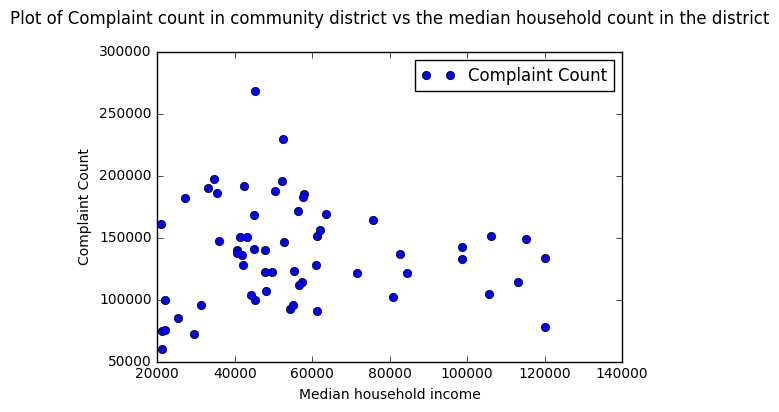

In [263]:
pl.plot(complaints_demographics_internet['Median household income (In 2014 Inflation Adjusted Dollars)'], \
        complaints_demographics_internet['Complaint Count'], 'o')
pl.xlabel('Median household income')
pl.ylabel('Complaint Count')
pl.title('Plot of Complaint count in community district vs the median household count in the district\n')
pl.legend()
pl.show()


### As observed by the plot, community districts with low income are less likely to make 311 calls. Most community districts with a median income of more than 40,000 USD make more than 100,000 calls.

### Community districts with median income of betwenn 40,000 USD to 80,000 USD make the most 311 calls.

### There is no proportional increase in 311 calls made by high median income group (median income > 100,000 USD) and those community districts make average if not less 311 calls as compared to the middle median income group

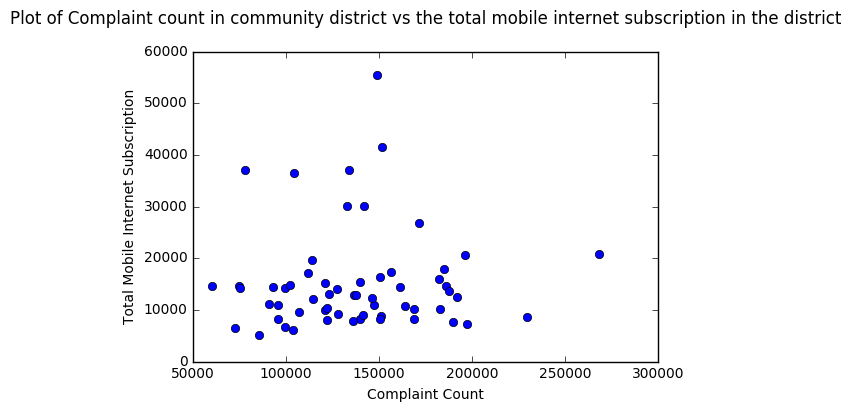

In [262]:
pl.plot(complaints_demographics_internet['Complaint Count'], \
        complaints_demographics_internet['Total Mobile Subscription'], 'o')
pl.xlabel('Complaint Count')
pl.ylabel('Total Mobile Internet Subscription')
pl.title('Plot of Complaint count in community district vs the total mobile internet subscription in the district\n')
# pl.legend()
pl.show()

### Locations with high mobile internet subscription do not have a proportional increase in complain count. Complain count varies from 10,000 to 20,000 without any significant change in mobile internet subscription